In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [176]:
training_data_original = pd.read_csv('pick_time_warehouse_train.csv')
training_data_original

,sl.no,Pick_Time,Start_Time_of_Picking,SKU,Actual_Quantity,User,manning,last_station_served_by_user,number_of_items_container,total_quantity_of_items_in_container,volume_of_items_present_in_container,Total_Weight_of_items_present_in_container,volume_of_items,Height_of_item,Length_of_item,Width_of_item,Cube_of_item,weight_of_each_item,total_time_spent_by_user_in_minutes,total_quantity_picked_by_user,Location,number_of_container_conveyor,station,day
0,896,28.520,21:03.3,23,1,29,2,197,0,0,0.000000,0.0000,36.093750,2.75,5.25,2.50,0.021,1.0400,137,500.0,166,2,197,27
1,897,0.460,42:45.2,3,6,34,2,143,1,2,260.156250,4.4600,318.750000,8.50,2.50,2.50,0.031,0.4062,215,855.0,8,1,142,29
2,898,6.013,51:38.0,3,1,64,2,142,1,1,204.750000,0.6875,53.125000,8.50,2.50,2.50,0.031,0.4062,265,850.0,8,1,142,27
3,899,6.413,54:42.2,13,1,46,2,197,3,3,586.125000,3.7500,70.000000,7.00,10.00,1.00,0.041,1.1000,397,1121.0,184,0,197,28
4,900,24.263,42:44.6,196,1,38,2,143,4,4,995.859375,2.5250,420.000000,6.00,7.00,10.00,0.243,3.5000,546,829.0,64,1,143,29
5,901,9.927,22:28.9,90,1,43,1,143,12,14,1016.250000,12.2975,49.218750,1.50,6.25,5.25,0.028,0.8750,175,367.0,60,2,143,25
6,902,12.130,42:14.0,17,1,60,2,197,0,0,0.000000,0.0000,37.812500,2.75,5.00,2.75,0.022,1.2812,98,204.0,128,0,196,25
7,903,10.296,43:44.7,201,1,55,2,180,4,8,1066.000000,5.9000,286.000000,5.50,8.00,6.50,0.166,2.0000,216,644.0,228,0,180,21
8,904,19.150,40:24.2,212,1,35,1,143,0,0,0.000000,0.0000,149.531250,7.25,8.25,2.50,0.087,0.1250,604,1216.0,68,0,143,28
9,905,14.933,10:36.8,77,3,60,3,197,1,1,169.312500,0.9200,105.468750,2.50,3.75,3.75,0.020,0.3750,121,471.0,85,1,196,23


In [177]:
corr = training_data_original.corr()
corr.style.background_gradient(cmap='coolwarm')

,sl.no,Pick_Time,SKU,Actual_Quantity,User,manning,last_station_served_by_user,number_of_items_container,total_quantity_of_items_in_container,volume_of_items_present_in_container,Total_Weight_of_items_present_in_container,volume_of_items,Height_of_item,Length_of_item,Width_of_item,Cube_of_item,weight_of_each_item,total_time_spent_by_user_in_minutes,total_quantity_picked_by_user,Location,number_of_container_conveyor,station,day
sl.no,1,-0.00228182,-0.00288385,-0.00220394,-0.00251858,-0.00425982,-0.00459761,0.000478051,0.0058653,0.00106664,-0.00294328,-0.00178641,0.00588404,-0.00779699,-0.00884691,-0.00297204,0.000143498,0.00574708,0.00244363,-0.000773914,-0.00228774,-0.00510377,0.000241937
Pick_Time,-0.00228182,1,0.0371323,0.265857,-0.0169246,-0.0299883,0.000939656,-0.0289907,-0.00652358,-0.013496,-0.0275185,0.164724,0.00375196,-0.0554989,-0.00185228,0.000940919,-0.00969557,-0.00160139,-0.0201641,-0.0217278,-0.0734563,-0.00324225,-0.023271
SKU,-0.00288385,0.0371323,1,-0.0378109,-0.00149952,0.0216009,-0.122135,0.0125033,0.0117071,-0.00112334,-0.0215407,0.0906916,-0.0655781,-0.0413244,0.273666,0.187837,-0.0761291,-0.000298447,-0.00617901,-0.0440884,0.0164018,-0.122977,0.00534943
Actual_Quantity,-0.00220394,0.265857,-0.0378109,1,0.0166605,-0.0114518,-0.0146521,-0.0796793,-0.000878782,-0.0375594,-0.0628492,0.411986,-0.00927029,-0.158912,-0.0636697,-0.0925874,-0.0768819,0.00923292,0.011027,-0.0425635,-0.0168701,-0.0156332,-0.0122789
User,-0.00251858,-0.0169246,-0.00149952,0.0166605,1,0.109753,-0.247949,0.00538747,0.00692301,-0.0014921,0.0058213,0.0260357,0.0589984,-0.0408838,-0.017323,0.0251958,0.0362789,-0.051907,-0.0516703,-0.0879085,-0.0465698,-0.250871,-0.0925765
manning,-0.00425982,-0.0299883,0.0216009,-0.0114518,0.109753,1,-0.0755985,-0.0594785,-0.0639843,-0.0581946,-0.0496799,0.0120751,0.00339689,-0.00579789,0.023689,0.0220631,0.0108482,-0.0599759,0.0985694,-0.0997399,0.0283313,-0.0844741,0.01441
last_station_served_by_user,-0.00459761,0.000939656,-0.122135,-0.0146521,-0.247949,-0.0755985,1,0.0153874,0.0125278,0.0150898,0.0151413,-0.125471,-0.121562,0.0580738,-0.0615392,-0.167628,-0.097909,-0.00257084,0.0193918,0.59303,-0.069056,0.97979,-0.0436665
number_of_items_container,0.000478051,-0.0289907,0.0125033,-0.0796793,0.00538747,-0.0594785,0.0153874,1,0.877635,0.844217,0.828832,-0.114759,-0.0272904,-0.00929498,-0.035253,-0.0675931,-0.0650292,0.00883535,0.00758392,0.0615623,0.0174568,0.0186541,-0.0204478
total_quantity_of_items_in_container,0.0058653,-0.00652358,0.0117071,-0.000878782,0.00692301,-0.0639843,0.0125278,0.877635,1,0.82765,0.701836,-0.0663354,-0.0189247,-0.0277887,-0.0320346,-0.0607286,-0.0534655,0.009425,0.0116094,0.0584224,0.0148627,0.015808,-0.0264978
volume_of_items_present_in_container,0.00106664,-0.013496,-0.00112334,-0.0375594,-0.0014921,-0.0581946,0.0150898,0.844217,0.82765,1,0.825137,-0.075524,-0.0117923,-0.00638166,-0.028978,-0.0493226,-0.0380186,0.00654059,0.0109266,0.0619695,0.0174511,0.0190672,-0.029848


In [0]:
training_data = pd.read_csv('pick_time_warehouse_train.csv')
training_data = training_data.dropna()

In [179]:
training_data = training_data[['Pick_Time', 'manning', 'Actual_Quantity', 'Location', 'User', 'number_of_container_conveyor', 'volume_of_items', 'Total_Weight_of_items_present_in_container', 'volume_of_items_present_in_container']]
training_data.dropna()
training_data

,Pick_Time,manning,Actual_Quantity,Location,User,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container
0,28.520,2,1,166,29,2,36.093750,0.0000,0.000000
1,0.460,2,6,8,34,1,318.750000,4.4600,260.156250
2,6.013,2,1,8,64,1,53.125000,0.6875,204.750000
3,6.413,2,1,184,46,0,70.000000,3.7500,586.125000
4,24.263,2,1,64,38,1,420.000000,2.5250,995.859375
5,9.927,1,1,60,43,2,49.218750,12.2975,1016.250000
6,12.130,2,1,128,60,0,37.812500,0.0000,0.000000
7,10.296,2,1,228,55,0,286.000000,5.9000,1066.000000
8,19.150,1,1,68,35,0,149.531250,0.0000,0.000000
9,14.933,3,3,85,60,1,105.468750,0.9200,169.312500


In [180]:
user = training_data.pop('User')
for i in range(100):
    training_data['User '+str(i+1)] = (user == i+1)*1.0
location = training_data.pop('Location')
for i in range(300):
    training_data['Location '+str(i+1)] = (location == i+1)*1.0
# number_of_container_conveyor = training_data.pop('number_of_container_conveyor')
# for i in range(5):
#     training_data['number_of_container_conveyor '+str(i+1)] = (number_of_container_conveyor == i+1)*1.0
training_data['number_of_container_conveyor'] = training_data['number_of_container_conveyor'].multiply(1.0)
training_data['manning'] = training_data['manning'].multiply(1.0)
training_data['Actual_Quantity'] = training_data['Actual_Quantity'].multiply(1.0)
training_data

,Pick_Time,manning,Actual_Quantity,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,User 10,User 11,User 12,User 13,User 14,User 15,User 16,User 17,User 18,User 19,User 20,User 21,User 22,User 23,User 24,User 25,User 26,User 27,User 28,User 29,User 30,User 31,User 32,User 33,...,Location 261,Location 262,Location 263,Location 264,Location 265,Location 266,Location 267,Location 268,Location 269,Location 270,Location 271,Location 272,Location 273,Location 274,Location 275,Location 276,Location 277,Location 278,Location 279,Location 280,Location 281,Location 282,Location 283,Location 284,Location 285,Location 286,Location 287,Location 288,Location 289,Location 290,Location 291,Location 292,Location 293,Location 294,Location 295,Location 296,Location 297,Location 298,Location 299,Location 300
0,28.520,2.0,1.0,2.0,36.093750,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.460,2.0,6.0,1.0,318.750000,4.4600,260.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.013,2.0,1.0,1.0,53.125000,0.6875,204.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.413,2.0,1.0,0.0,70.000000,3.7500,586.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.263,2.0,1.0,1.0,420.000000,2.5250,995.859375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.927,1.0,1.0,2.0,49.218750,12.2975,1016.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12.130,2.0,1.0,0.0,37.812500,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10.296,2.0,1.0,0.0,286.000000,5.9000,1066.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19.150,1.0,1.0,0.0,149.531250,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [181]:
training_data

,Pick_Time,manning,Actual_Quantity,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,User 10,User 11,User 12,User 13,User 14,User 15,User 16,User 17,User 18,User 19,User 20,User 21,User 22,User 23,User 24,User 25,User 26,User 27,User 28,User 29,User 30,User 31,User 32,User 33,...,Location 261,Location 262,Location 263,Location 264,Location 265,Location 266,Location 267,Location 268,Location 269,Location 270,Location 271,Location 272,Location 273,Location 274,Location 275,Location 276,Location 277,Location 278,Location 279,Location 280,Location 281,Location 282,Location 283,Location 284,Location 285,Location 286,Location 287,Location 288,Location 289,Location 290,Location 291,Location 292,Location 293,Location 294,Location 295,Location 296,Location 297,Location 298,Location 299,Location 300
0,28.520,2.0,1.0,2.0,36.093750,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.460,2.0,6.0,1.0,318.750000,4.4600,260.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.013,2.0,1.0,1.0,53.125000,0.6875,204.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.413,2.0,1.0,0.0,70.000000,3.7500,586.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.263,2.0,1.0,1.0,420.000000,2.5250,995.859375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.927,1.0,1.0,2.0,49.218750,12.2975,1016.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12.130,2.0,1.0,0.0,37.812500,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10.296,2.0,1.0,0.0,286.000000,5.9000,1066.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19.150,1.0,1.0,0.0,149.531250,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
msk = np.random.rand(len(training_data)) < 0.8
train = training_data[msk]
test = training_data[~msk]

In [183]:
train

,Pick_Time,manning,Actual_Quantity,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,User 10,User 11,User 12,User 13,User 14,User 15,User 16,User 17,User 18,User 19,User 20,User 21,User 22,User 23,User 24,User 25,User 26,User 27,User 28,User 29,User 30,User 31,User 32,User 33,...,Location 261,Location 262,Location 263,Location 264,Location 265,Location 266,Location 267,Location 268,Location 269,Location 270,Location 271,Location 272,Location 273,Location 274,Location 275,Location 276,Location 277,Location 278,Location 279,Location 280,Location 281,Location 282,Location 283,Location 284,Location 285,Location 286,Location 287,Location 288,Location 289,Location 290,Location 291,Location 292,Location 293,Location 294,Location 295,Location 296,Location 297,Location 298,Location 299,Location 300
0,28.520,2.0,1.0,2.0,36.093750,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.460,2.0,6.0,1.0,318.750000,4.4600,260.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.013,2.0,1.0,1.0,53.125000,0.6875,204.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.413,2.0,1.0,0.0,70.000000,3.7500,586.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.263,2.0,1.0,1.0,420.000000,2.5250,995.859375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.927,1.0,1.0,2.0,49.218750,12.2975,1016.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12.130,2.0,1.0,0.0,37.812500,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10.296,2.0,1.0,0.0,286.000000,5.9000,1066.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19.150,1.0,1.0,0.0,149.531250,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [184]:
test

,Pick_Time,manning,Actual_Quantity,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,User 10,User 11,User 12,User 13,User 14,User 15,User 16,User 17,User 18,User 19,User 20,User 21,User 22,User 23,User 24,User 25,User 26,User 27,User 28,User 29,User 30,User 31,User 32,User 33,...,Location 261,Location 262,Location 263,Location 264,Location 265,Location 266,Location 267,Location 268,Location 269,Location 270,Location 271,Location 272,Location 273,Location 274,Location 275,Location 276,Location 277,Location 278,Location 279,Location 280,Location 281,Location 282,Location 283,Location 284,Location 285,Location 286,Location 287,Location 288,Location 289,Location 290,Location 291,Location 292,Location 293,Location 294,Location 295,Location 296,Location 297,Location 298,Location 299,Location 300
9,14.933,3.0,3.0,1.0,105.468750,0.9200,169.312500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,23.734,2.0,1.0,0.0,146.625000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,8.630,2.0,3.0,0.0,439.875000,7.0587,612.656369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,19.326,1.0,1.0,0.0,152.000000,1.3062,285.537500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,7.356,1.0,1.0,0.0,63.375000,3.0382,303.468750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,37.036,2.0,1.0,0.0,168.000000,2.0400,176.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,13.903,1.0,1.0,3.0,36.125000,1.8125,120.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,13.954,2.0,4.0,4.0,140.625000,3.1937,657.768226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,5.497,1.0,1.0,0.0,56.718750,11.2669,1253.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

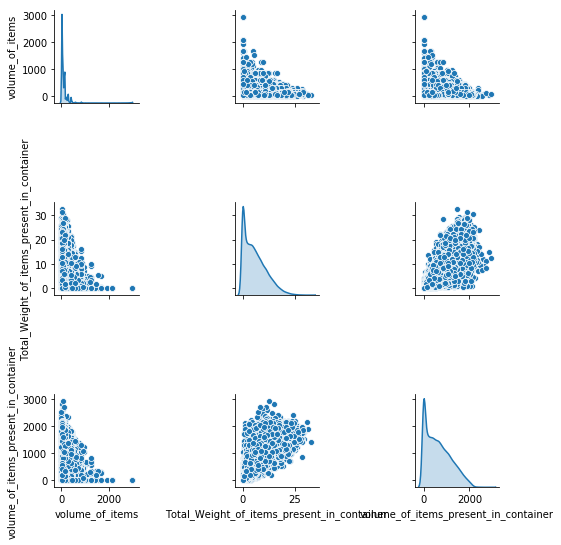

In [185]:
sns.pairplot(train[["volume_of_items", "Total_Weight_of_items_present_in_container", "volume_of_items_present_in_container"]], diag_kind="kde")
plt.show()

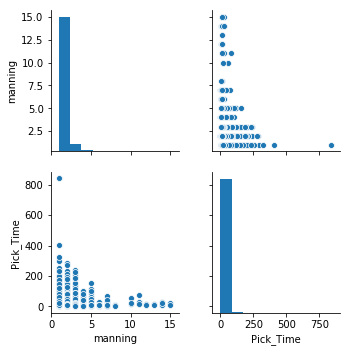

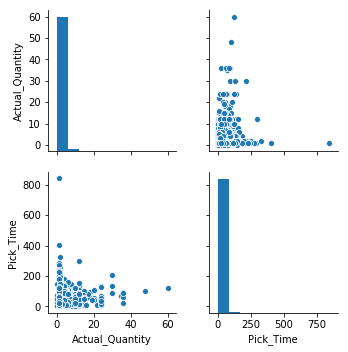

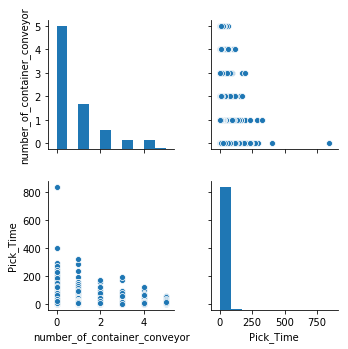

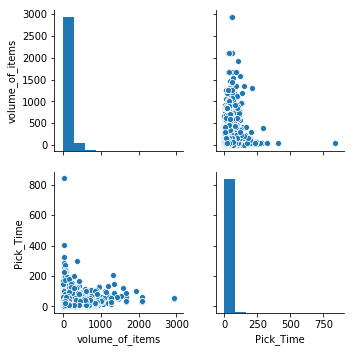

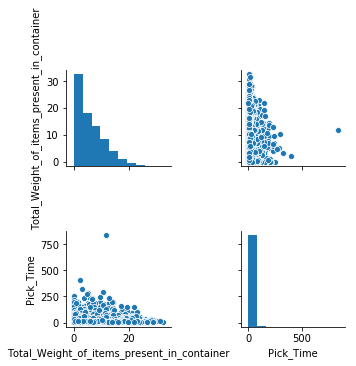

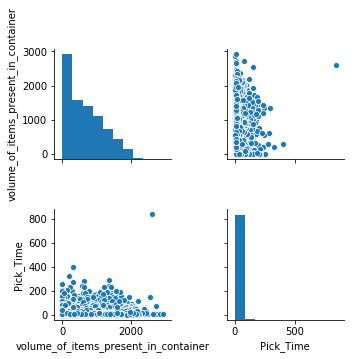

In [186]:
sns.pairplot(train[["manning", "Pick_Time" ]])
sns.pairplot(train[["Actual_Quantity", "Pick_Time" ]])
sns.pairplot(train[["number_of_container_conveyor", "Pick_Time" ]])
sns.pairplot(train[["volume_of_items", "Pick_Time" ]])
sns.pairplot(train[["Total_Weight_of_items_present_in_container", "Pick_Time" ]])
sns.pairplot(train[["volume_of_items_present_in_container", "Pick_Time" ]])
plt.show()

In [187]:
train_stats = train.describe()
train_stats.pop('Pick_Time')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
manning,36982.0,1.723920,0.745215,1.0,1.000000,2.000000,2.000000,15.00000
Actual_Quantity,36982.0,1.493943,1.447588,0.0,1.000000,1.000000,2.000000,60.00000
number_of_container_conveyor,36982.0,0.735953,1.121829,0.0,0.000000,0.000000,1.000000,5.00000
volume_of_items,36982.0,109.140298,125.730617,0.0,36.093750,66.000000,146.625000,2940.00000
Total_Weight_of_items_present_in_container,36982.0,5.955244,5.257619,0.0,1.450000,4.900000,9.210000,32.55250
volume_of_items_present_in_container,36982.0,655.138396,543.223638,0.0,172.440225,567.747875,1038.085938,2930.91425
User 1,36982.0,0.000892,0.029859,0.0,0.000000,0.000000,0.000000,1.00000
User 2,36982.0,0.000081,0.009006,0.0,0.000000,0.000000,0.000000,1.00000
User 3,36982.0,0.000054,0.007354,0.0,0.000000,0.000000,0.000000,1.00000
User 4,36982.0,0.000108,0.010400,0.0,0.000000,0.000000,0.000000,1.00000


In [188]:
test_stats = test.describe()
test_stats.pop('Pick_Time')
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
manning,9303.0,1.729227,0.773188,1.0,1.00000,2.00000,2.000000,15.00000
Actual_Quantity,9303.0,1.497151,1.460792,0.0,1.00000,1.00000,2.000000,48.00000
number_of_container_conveyor,9303.0,0.762550,1.131937,0.0,0.00000,0.00000,1.000000,5.00000
volume_of_items,9303.0,107.848055,121.813829,0.0,36.09375,66.40625,146.625000,2100.00000
Total_Weight_of_items_present_in_container,9303.0,5.935941,5.284357,0.0,1.41690,4.85750,9.195600,31.12240
volume_of_items_present_in_container,9303.0,655.900298,547.119162,0.0,168.00000,563.50000,1042.395625,4094.59375
User 1,9303.0,0.001075,0.032770,0.0,0.00000,0.00000,0.000000,1.00000
User 2,9303.0,0.000107,0.010368,0.0,0.00000,0.00000,0.000000,1.00000
User 3,9303.0,0.000107,0.010368,0.0,0.00000,0.00000,0.000000,1.00000
User 4,9303.0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.00000


In [0]:
train_labels = train.pop('Pick_Time')
test_labels = test.pop('Pick_Time')

In [0]:
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train = norm(train)
# normed_test = norm(test)
# normed_train = normed_train.fillna(0.0)
# normed_test = normed_test.fillna(0.0)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, kernel_initializer='normal', activation='relu', input_dim = train.shape[1]),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'),
    ])

In [0]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), metrics=['mean_absolute_error', 'mean_squared_error'])

In [194]:
early_stop = keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=10)

history = model.fit(train, train_labels, epochs=100, batch_size = 32, callbacks=[early_stop])

Epoch 1/100
36982/36982 [==============================] - 3s 75us/sample - loss: 317.6085 - mean_absolute_error: 10.3781 - mean_squared_error: 317.6086
Epoch 2/100
36982/36982 [==============================] - 3s 68us/sample - loss: 283.0948 - mean_absolute_error: 9.5283 - mean_squared_error: 283.0947
Epoch 3/100
36982/36982 [==============================] - 2s 67us/sample - loss: 280.1452 - mean_absolute_error: 9.3820 - mean_squared_error: 280.1449
Epoch 4/100
36982/36982 [==============================] - 2s 67us/sample - loss: 278.2008 - mean_absolute_error: 9.3025 - mean_squared_error: 278.2008
Epoch 5/100
36982/36982 [==============================] - 2s 67us/sample - loss: 276.1066 - mean_absolute_error: 9.2191 - mean_squared_error: 276.1070
Epoch 6/100
36982/36982 [==============================] - 2s 67us/sample - loss: 274.0673 - mean_absolute_error: 9.1396 - mean_squared_error: 274.0674
Epoch 7/100
36982/36982 [==============================] - 3s 69us/sample - loss: 271.7

In [195]:
y_pred = model.predict(test)
len(y_pred)

9303

In [196]:
mean_squared_error(test_labels, y_pred)
len(test_labels)

9303

In [203]:
y_pred = model.predict(test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_labels, y_pred)

7.536240813699291

In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mean_absolute_error,mean_squared_error,epoch
0,490.633581,15.225848,489.896606,0
1,443.058734,13.969907,442.429840,1
2,374.091559,11.589129,373.481506,2
3,300.212158,8.554946,299.619415,3
4,252.881718,7.092706,252.300491,4
5,239.572250,7.385263,238.994598,5
6,237.300537,7.531944,236.725952,6
7,236.952249,7.577760,236.381119,7
8,236.623436,7.546731,236.054443,8
9,236.846829,7.576766,236.286407,9


<Figure size 432x288 with 0 Axes>

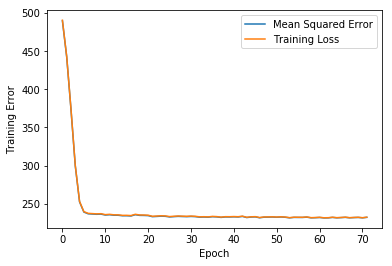

In [125]:
EPOCHS = 1000
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plt.clf()
plt.figure()

x = hist['epoch']
y = hist['mean_squared_error']
z = hist['loss']
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.plot(x,y, label='Mean Squared Error')
plt.plot(x,z, label='Training Loss')
plt.legend()

plt.show()

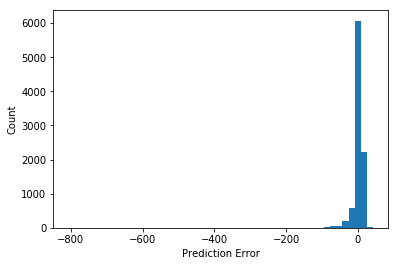

In [126]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
plt.show()

In [130]:
test_data = pd.read_csv('pick_time_warehouse_test.csv')
test_data

,sl.no,Start_Time_of_Picking,SKU,Actual_Quantity,User,manning,last_station_served_by_user,number_of_items_container,total_quantity_of_items_in_container,volume_of_items_present_in_container,Total_Weight_of_items_present_in_container,volume_of_items,Height_of_item,Length_of_item,Width_of_item,Cube_of_item,weight_of_each_item,total_time_spent_by_user_in_minutes,total_quantity_picked_by_user,Location,number_of_container_conveyor,station,day
0,1242,22:00.9,28,1,55,2,180,3,4,165.250000,1.8625,56.718750,1.25,8.25,5.50,0.033,0.4000,255,808.0,286,0,180,21
1,1243,38:37.2,148,2,22,1,180,4,6,734.156250,6.9362,52.812500,2.50,3.25,3.25,0.015,0.3312,187,420.0,244,0,180,29
2,1244,05:41.0,42,1,87,1,196,0,0,0.000000,0.0000,146.625000,3.00,11.50,4.25,0.085,1.8400,455,942.0,93,1,196,28
3,1245,07:48.3,77,8,16,2,197,5,9,936.062500,9.9206,281.250000,2.50,3.75,3.75,0.020,0.3750,158,674.0,85,0,196,22
4,1246,01:31.7,195,1,71,1,142,5,6,307.677500,4.8538,32.812500,5.25,2.50,2.50,0.019,0.2750,451,1060.0,17,0,142,28
5,1247,43:43.3,41,2,29,2,180,2,2,179.250000,3.1250,165.375000,3.00,5.25,5.25,0.048,1.0600,218,627.0,268,0,180,23
6,1248,44:42.6,94,1,22,2,180,2,4,824.000000,5.4875,152.000000,9.50,4.00,4.00,0.088,3.4875,553,1344.0,261,0,180,29
7,1249,53:53.3,91,1,67,2,197,1,2,304.000000,4.5750,15.937500,1.50,4.25,2.50,0.009,0.5000,501,1075.0,175,0,197,25
8,1250,54:53.7,77,6,16,2,197,4,13,849.250000,6.3887,210.937500,2.50,3.75,3.75,0.020,0.3750,265,843.0,85,0,196,22
9,1251,22:45.2,92,1,83,1,142,8,11,1164.640625,13.3813,34.375000,2.75,5.00,2.50,0.020,1.0125,442,788.0,15,2,142,24


In [132]:
test_data = test_data[['manning', 'Actual_Quantity', 'Location', 'User', 'number_of_container_conveyor', 'volume_of_items', 'Total_Weight_of_items_present_in_container', 'volume_of_items_present_in_container']]
test_data

,manning,Actual_Quantity,Location,User,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container
0,2,1,286,55,0,56.718750,1.8625,165.250000
1,1,2,244,22,0,52.812500,6.9362,734.156250
2,1,1,93,87,1,146.625000,0.0000,0.000000
3,2,8,85,16,0,281.250000,9.9206,936.062500
4,1,1,17,71,0,32.812500,4.8538,307.677500
5,2,2,268,29,0,165.375000,3.1250,179.250000
6,2,1,261,22,0,152.000000,5.4875,824.000000
7,2,1,175,67,0,15.937500,4.5750,304.000000
8,2,6,85,16,0,210.937500,6.3887,849.250000
9,1,1,15,83,2,34.375000,13.3813,1164.640625


In [133]:
test_data.fillna(0.0)

,manning,Actual_Quantity,Location,User,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container
0,2,1,286,55,0,56.718750,1.8625,165.250000
1,1,2,244,22,0,52.812500,6.9362,734.156250
2,1,1,93,87,1,146.625000,0.0000,0.000000
3,2,8,85,16,0,281.250000,9.9206,936.062500
4,1,1,17,71,0,32.812500,4.8538,307.677500
5,2,2,268,29,0,165.375000,3.1250,179.250000
6,2,1,261,22,0,152.000000,5.4875,824.000000
7,2,1,175,67,0,15.937500,4.5750,304.000000
8,2,6,85,16,0,210.937500,6.3887,849.250000
9,1,1,15,83,2,34.375000,13.3813,1164.640625


In [134]:
user = test_data.pop('User')
for i in range(100):
    test_data['User '+str(i+1)] = (user == i+1)*1.0
location = test_data.pop('Location')
for i in range(300):
    test_data['Location '+str(i+1)] = (location == i+1)*1.0
# number_of_container_conveyor = test_data.pop('number_of_container_conveyor')
# for i in range(5):
#     test_data['number_of_container_conveyor '+str(i+1)] = (number_of_container_conveyor == i+1)*1.0
test_data['number_of_container_conveyor'] = test_data['number_of_container_conveyor'].multiply(1.0)
test_data['manning'] = test_data['manning'].multiply(1.0)
test_data['Actual_Quantity'] = test_data['Actual_Quantity'].multiply(1.0)
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,manning,Actual_Quantity,number_of_container_conveyor,volume_of_items,Total_Weight_of_items_present_in_container,volume_of_items_present_in_container,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,User 10,User 11,User 12,User 13,User 14,User 15,User 16,User 17,User 18,User 19,User 20,User 21,User 22,User 23,User 24,User 25,User 26,User 27,User 28,User 29,User 30,User 31,User 32,User 33,User 34,...,Location 261,Location 262,Location 263,Location 264,Location 265,Location 266,Location 267,Location 268,Location 269,Location 270,Location 271,Location 272,Location 273,Location 274,Location 275,Location 276,Location 277,Location 278,Location 279,Location 280,Location 281,Location 282,Location 283,Location 284,Location 285,Location 286,Location 287,Location 288,Location 289,Location 290,Location 291,Location 292,Location 293,Location 294,Location 295,Location 296,Location 297,Location 298,Location 299,Location 300
0,2.0,1.0,0.0,56.718750,1.8625,165.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,0.0,52.812500,6.9362,734.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,146.625000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,8.0,0.0,281.250000,9.9206,936.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,32.812500,4.8538,307.677500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,2.0,0.0,165.375000,3.1250,179.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,1.0,0.0,152.000000,5.4875,824.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,1.0,0.0,15.937500,4.5750,304.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,6.0,0.0,210.937500,6.3887,849.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
y_test_pred = model.predict(test_data)

In [136]:
y_test_pred

array([[12.990331],
       [17.674892],
       [13.503488],
       ...,
       [12.588837],
       [16.312977],
       [17.006523]], dtype=float32)

In [140]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred

,0
0,12.990331
1,17.674892
2,13.503488
3,40.273899
4,13.889516
5,22.704285
6,12.558171
7,11.177049
8,34.784950
9,10.217573


In [0]:
y_test_pred.to_csv('final2.csv', index=False)